In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset=pd.read_csv('C:\\Users\\Shridatta\\Desktop\\smsspamcollection - Copy\\SMSSpamCollection.csv', sep='\t', names=['label', 'message'])

In [3]:
dataset

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


## Exploratory Data Analysis(EDA)

In [4]:
dataset.shape

(5572, 2)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
dataset.columns

Index(['label', 'message'], dtype='object')

In [7]:
dataset.isna().sum()

label      0
message    0
dtype: int64

#### No NaN values in dataset.

In [8]:
dataset.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
dataset.tail()

,label,message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [10]:
dataset.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [11]:
dataset['label']=dataset['label'].map({'ham':0,'spam':1})

In [12]:
dataset.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
dataset.tail()

,label,message
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...
5571,0,Rofl. Its true to its name


<AxesSubplot:xlabel='label', ylabel='count'>

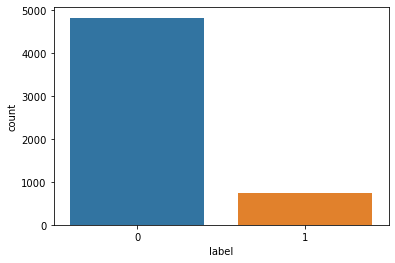

In [14]:
sns.countplot(data=dataset,x='label')

#### It is evident that the dataset is imbalanced.

## Feature Engineering

In [15]:
dataset['word_count']=dataset['message'].apply(lambda x: len(x.split()))

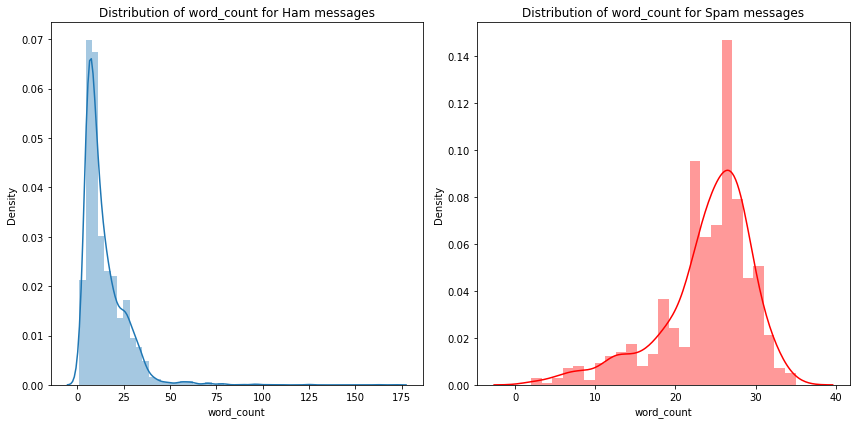

In [16]:
plt.figure(figsize=(12, 6))

# 1-row, 2-column, go to the first subplot
plt.subplot(1, 2, 1)
g = sns.distplot(a=dataset[dataset['label']==0].word_count)
p = plt.title('Distribution of word_count for Ham messages')

# 1-row, 2-column, go to the second subplot
plt.subplot(1, 2, 2)
g = sns.distplot(a=dataset[dataset['label']==1].word_count, color='red')
p = plt.title('Distribution of word_count for Spam messages')

plt.tight_layout()
plt.show()

In [17]:
def numbers(x):
    numbers=['0','1','2','3','4','5','6','7','8','9']
    for i in numbers:
        if i in x:
            return 1
    return 0

In [18]:
dataset['contains_number']=dataset.message.apply(numbers)

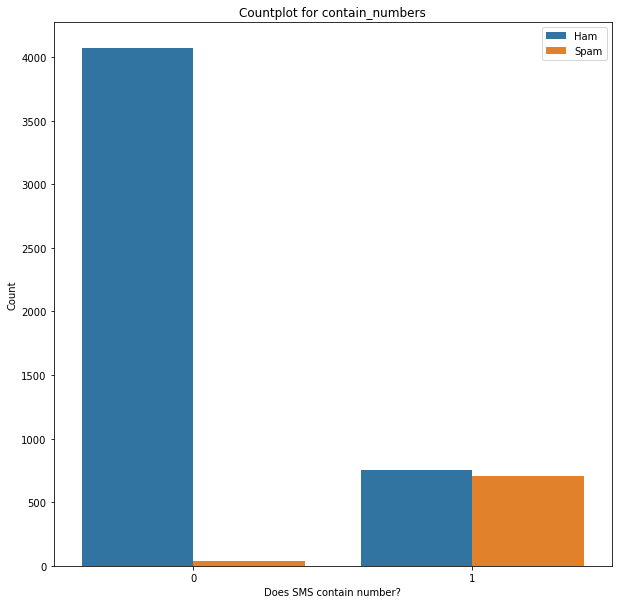

In [19]:
plt.figure(figsize=(10,10))
g = sns.countplot(x='contains_number', data=dataset, hue='label')
p = plt.title('Countplot for contain_numbers')
p = plt.xlabel('Does SMS contain number?')
p = plt.ylabel('Count')
p = plt.legend(labels=['Ham', 'Spam'])

#### Most of the Spam messages contain numbers compared to Ham messgaes.

## Data Cleaning

In [23]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shridatta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Shridatta\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [24]:
corpus=[]
lemmatizer=WordNetLemmatizer()
for msgs_str in list(dataset.message):
    message=re.sub(pattern='[^a-zA-Z]',repl=' ',string=msgs_str)
    message=message.lower()
    words=message.split()
    spl_words=[lemmatizer.lemmatize(word) for word in words if word not in set(stopwords.words('english'))]
    message=' '.join(spl_words)
    corpus.append(message)

In [25]:
corpus[0:3]

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply']

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [30]:
tfidf=TfidfVectorizer(max_features=1000)
vectors=tfidf.fit_transform(corpus).toarray()
feature_names=tfidf.get_feature_names()

In [31]:
pickle.dump(tfidf,open('tfidf_transform.pkl','wb'))

In [32]:
X=pd.DataFrame(vectors,columns=feature_names)
y=dataset['label']

In [33]:
import imblearn

In [34]:
from imblearn.over_sampling import RandomOverSampler

In [35]:
from sklearn.model_selection import train_test_split, cross_val_score
from collections import Counter
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score

In [36]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
os=RandomOverSampler(0.90)
X_train_ns,y_train_ns=os.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 3859, 1: 598})
The number of classes after fit Counter({0: 3859, 1: 3473})


#### Handling imbalance dataset.

## Model Building and Analysis

In [38]:
from sklearn.naive_bayes import MultinomialNB

In [39]:
mnb = MultinomialNB()
cv = cross_val_score(mnb, X, y, scoring='f1', cv=10)
print('Average F1-Score for MNB model: {} '.format(round(cv.mean(), 3)))

Average F1-Score for MNB model: 0.918 


In [40]:
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)

print('Classification report for MNB model')
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))

Classification report for MNB model
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       0.97      0.89      0.93       149

    accuracy                           0.98      1115
   macro avg       0.98      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115

0.9811659192825112


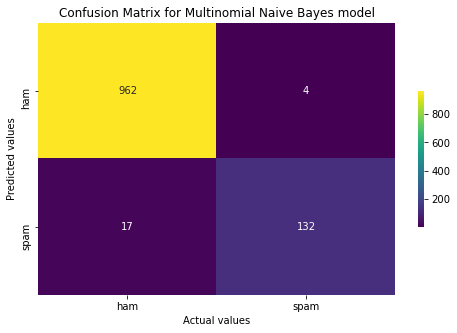

In [41]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,5))
axis_labels = ['ham', 'spam']
g = sns.heatmap(data=cm, annot=True, cmap="viridis", xticklabels=axis_labels, yticklabels=axis_labels, fmt='g', cbar_kws={"shrink": 0.5})
p = plt.xlabel('Actual values')
p = plt.ylabel('Predicted values')
p = plt.title('Confusion Matrix for Multinomial Naive Bayes model')

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [43]:
dtm=DecisionTreeClassifier()
cv = cross_val_score(dtm, X, y, scoring='f1', cv=10)
print('Average F1-Score for DT model: {} '.format(round(cv.mean(), 3)))
dtm.fit(X_train, y_train)
y_pred1 = dtm.predict(X_test)

print('Classification report for DT model')
print(classification_report(y_test, y_pred1))
print(accuracy_score(y_test,y_pred))

Average F1-Score for DT model: 0.885 
Classification report for DT model
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       966
           1       0.87      0.87      0.87       149

    accuracy                           0.97      1115
   macro avg       0.93      0.93      0.93      1115
weighted avg       0.97      0.97      0.97      1115

0.9811659192825112


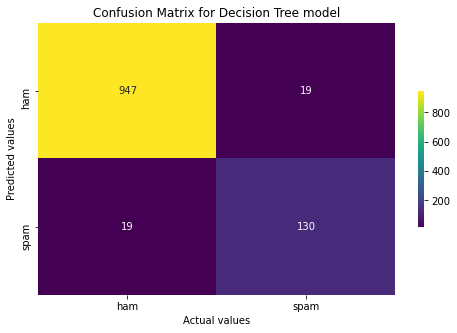

In [44]:
cm = confusion_matrix(y_test, y_pred1)

plt.figure(figsize=(8,5))
axis_labels = ['ham', 'spam']
g = sns.heatmap(data=cm, annot=True, cmap="viridis", xticklabels=axis_labels, yticklabels=axis_labels, fmt='g', cbar_kws={"shrink": 0.5})
p = plt.xlabel('Actual values')
p = plt.ylabel('Predicted values')
p = plt.title('Confusion Matrix for Decision Tree model')

In [98]:
rfm=RandomForestClassifier()
cv = cross_val_score(rfm, X, y, scoring='f1', cv=10)
print('Average F1-Score for RF model: {} '.format(round(cv.mean(), 3)))
rfm.fit(X_train, y_train)
y_pred2 = rfm.predict(X_test)

print('Classification report for RF model')
print(classification_report(y_test, y_pred2))
print(accuracy_score(y_test,y_pred))

Average F1-Score for RF model: 0.934 
Classification report for RF model
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       966
           1       1.00      0.89      0.94       149

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.97      1115
weighted avg       0.99      0.98      0.98      1115

0.9829596412556054


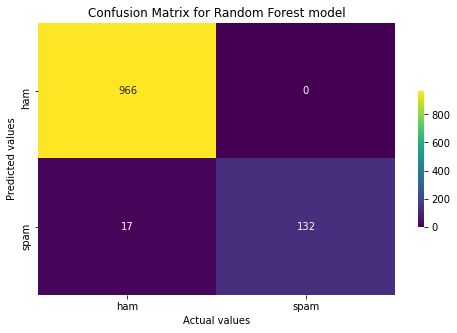

In [99]:
cm = confusion_matrix(y_test, y_pred2)

plt.figure(figsize=(8,5))
axis_labels = ['ham', 'spam']
g = sns.heatmap(data=cm, annot=True, cmap="viridis", xticklabels=axis_labels, yticklabels=axis_labels, fmt='g', cbar_kws={"shrink": 0.5})
p = plt.xlabel('Actual values')
p = plt.ylabel('Predicted values')
p = plt.title('Confusion Matrix for Random Forest model')

#### Random forest model is having good F1 score and accuracy score, so this model is used for predicting the results of this problem statement.

In [82]:
import pickle

In [83]:
file_name='spam-sms-rfmodel.pkl'
pickle.dump(rfm,open(file_name,'wb'))

In [84]:
pickle_model=pickle.load(open('spam-sms-rfmodel.pkl','rb'))

In [85]:
tfidf = pickle.load(open('tfidf_transform.pkl','rb'))

In [86]:
data=['IMPORTANT - You could be entitled up to £3,160 in compensation from mis-sold PPI on a credit card or loan. Please reply PPI for info or STOP to opt out']

In [87]:
vect = tfidf.transform(data).toarray()
pickle_model.predict(vect)

array([1], dtype=int64)